<a href="https://colab.research.google.com/github/devangi2000/Deep-Learning/blob/master/pyTorch_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn.functional as functional

#generate fake data and add noise
x = torch.randn(200, 1)
y = x.pow(4) + 0.05*torch.randn(x.size())


In [2]:
epoch = 100
learning_rate = 0.05

class Net(torch.nn.Module):
  def __init__(self, n_input, n_hidden, n_output):
    super(Net, self).__init__()
    self.hidden = torch.nn.Linear(n_input, n_hidden)
    self.output = torch.nn.Linear(n_hidden, n_output)

  def forward(self, input):
    hidden = functional.relu(self.hidden(input))
    output = self.output(hidden)
    return output


In [3]:
net = Net(1,15,1)
print(net)

Net(
  (hidden): Linear(in_features=1, out_features=15, bias=True)
  (output): Linear(in_features=15, out_features=1, bias=True)
)


In [4]:
lossFunc = torch.nn.MSELoss()

In [5]:
for i in range(epoch):
  output = net(x)
  loss = lossFunc(output, y)
  net.zero_grad()
  loss.backward()

  for f in net.parameters():
    f.data.sub_(learning_rate * f.grad.data)

  print(i, 'th loss is ', loss.squeeze())

0 th loss is  tensor(98.3496, grad_fn=<SqueezeBackward0>)
1 th loss is  tensor(82.6012, grad_fn=<SqueezeBackward0>)
2 th loss is  tensor(74.3282, grad_fn=<SqueezeBackward0>)
3 th loss is  tensor(68.8858, grad_fn=<SqueezeBackward0>)
4 th loss is  tensor(64.7003, grad_fn=<SqueezeBackward0>)
5 th loss is  tensor(60.9566, grad_fn=<SqueezeBackward0>)
6 th loss is  tensor(57.4967, grad_fn=<SqueezeBackward0>)
7 th loss is  tensor(54.2187, grad_fn=<SqueezeBackward0>)
8 th loss is  tensor(51.0546, grad_fn=<SqueezeBackward0>)
9 th loss is  tensor(47.9745, grad_fn=<SqueezeBackward0>)
10 th loss is  tensor(44.9959, grad_fn=<SqueezeBackward0>)
11 th loss is  tensor(42.1275, grad_fn=<SqueezeBackward0>)
12 th loss is  tensor(39.4172, grad_fn=<SqueezeBackward0>)
13 th loss is  tensor(36.8954, grad_fn=<SqueezeBackward0>)
14 th loss is  tensor(34.5634, grad_fn=<SqueezeBackward0>)
15 th loss is  tensor(32.4121, grad_fn=<SqueezeBackward0>)
16 th loss is  tensor(30.4177, grad_fn=<SqueezeBackward0>)
17 th l

In [6]:
seq_net = torch.nn.Sequential(torch.nn.Linear(1,15), torch.nn.ReLU(), torch.nn.Linear(15,1))
lossFunc = torch.nn.MSELoss()
print(seq_net)

Sequential(
  (0): Linear(in_features=1, out_features=15, bias=True)
  (1): ReLU()
  (2): Linear(in_features=15, out_features=1, bias=True)
)


In [7]:
for i in range(epoch):
  output = net(x)
  loss = lossFunc(output, y)
  net.zero_grad()
  loss.backward()

  for f in net.parameters():
    f.data.sub_(learning_rate * f.grad.data)

  print(i, 'th loss is ', loss.squeeze())

0 th loss is  tensor(9.6817, grad_fn=<SqueezeBackward0>)
1 th loss is  tensor(8.4218, grad_fn=<SqueezeBackward0>)
2 th loss is  tensor(10.0459, grad_fn=<SqueezeBackward0>)
3 th loss is  tensor(8.5776, grad_fn=<SqueezeBackward0>)
4 th loss is  tensor(10.1625, grad_fn=<SqueezeBackward0>)
5 th loss is  tensor(8.5229, grad_fn=<SqueezeBackward0>)
6 th loss is  tensor(10.0174, grad_fn=<SqueezeBackward0>)
7 th loss is  tensor(8.2886, grad_fn=<SqueezeBackward0>)
8 th loss is  tensor(9.6420, grad_fn=<SqueezeBackward0>)
9 th loss is  tensor(7.9251, grad_fn=<SqueezeBackward0>)
10 th loss is  tensor(9.1206, grad_fn=<SqueezeBackward0>)
11 th loss is  tensor(7.5038, grad_fn=<SqueezeBackward0>)
12 th loss is  tensor(8.5570, grad_fn=<SqueezeBackward0>)
13 th loss is  tensor(7.0801, grad_fn=<SqueezeBackward0>)
14 th loss is  tensor(8.0201, grad_fn=<SqueezeBackward0>)
15 th loss is  tensor(6.6980, grad_fn=<SqueezeBackward0>)
16 th loss is  tensor(7.5594, grad_fn=<SqueezeBackward0>)
17 th loss is  tensor

In [8]:
seq_net = torch.nn.Sequential(torch.nn.Linear(1,15), torch.nn.ReLU(), torch.nn.Linear(15,1))
lossFunc = torch.nn.MSELoss()
print(seq_net)

optim = torch.optim.SGD(seq_net.parameters(), lr=0.0611, momentum=0.9)
for i in range(epoch):
  output = seq_net(x)
  loss = lossFunc(output, y)
  optim.zero_grad()
  loss.backward()

  optim.step() #param updation
  if ((i+1) % 4) == 0:
    print(str(i+1) + ' th loss is '+ str(loss.squeeze()))

Sequential(
  (0): Linear(in_features=1, out_features=15, bias=True)
  (1): ReLU()
  (2): Linear(in_features=15, out_features=1, bias=True)
)
4 th loss is tensor(64.2278, grad_fn=<SqueezeBackward0>)
8 th loss is tensor(38.8788, grad_fn=<SqueezeBackward0>)
12 th loss is tensor(92.2776, grad_fn=<SqueezeBackward0>)
16 th loss is tensor(101.5517, grad_fn=<SqueezeBackward0>)
20 th loss is tensor(80.9151, grad_fn=<SqueezeBackward0>)
24 th loss is tensor(79.7701, grad_fn=<SqueezeBackward0>)
28 th loss is tensor(80.3601, grad_fn=<SqueezeBackward0>)
32 th loss is tensor(79.3924, grad_fn=<SqueezeBackward0>)
36 th loss is tensor(79.6857, grad_fn=<SqueezeBackward0>)
40 th loss is tensor(79.1633, grad_fn=<SqueezeBackward0>)
44 th loss is tensor(79.1659, grad_fn=<SqueezeBackward0>)
48 th loss is tensor(78.9998, grad_fn=<SqueezeBackward0>)
52 th loss is tensor(78.9705, grad_fn=<SqueezeBackward0>)
56 th loss is tensor(78.9683, grad_fn=<SqueezeBackward0>)
60 th loss is tensor(78.9324, grad_fn=<SqueezeB

Net(
  (hidden): Linear(in_features=1, out_features=15, bias=True)
  (output): Linear(in_features=15, out_features=1, bias=True)
)
Sequential(
  (0): Linear(in_features=1, out_features=15, bias=True)
  (1): ReLU()
  (2): Linear(in_features=15, out_features=1, bias=True)
)


IndexError: ignored

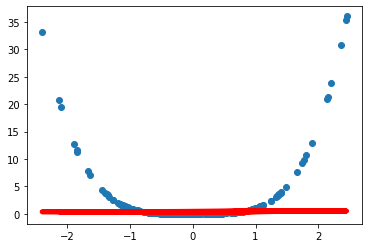

In [9]:
import torch
import torch.nn.functional as functional
import matplotlib.pyplot as plt


x = torch.randn(200,1) #Generate random data
y = x.pow(4) + 0.05*torch.rand(x.size()) #add some noise to the output
epoch = 1500
learning_rate = 0.05

#Manual Method. Involves building the layer architecture:

class Net(torch.nn.Module):
    def __init__(self,n_input,n_hidden,n_output):
        '''
        Intialize 2 layer neural net
        '''
        super(Net,self).__init__()
        self.hidden = torch.nn.Linear(n_input,n_hidden)
        self.output = torch.nn.Linear(n_hidden,n_output)
    
    def forward(self,input):
        '''
        input=> The input to compute forward prop on
        returns => output after forward prop
        '''
        hidden = functional.relu(self.hidden(input))
        output = self.output(hidden)
        return output

net = Net(1,15,1)
print(net)

#Antoher method using Sequential function. Much less work
seq_net = torch.nn.Sequential(torch.nn.Linear(1,15),
                              torch.nn.ReLU(),
                              torch.nn.Linear(15,1)
                             )

print(seq_net) #This should be same as net

lossFunc = torch.nn.MSELoss()  #Mean Squared Error Function
optim = torch.optim.SGD(seq_net.parameters(),lr=0.0611,momentum=0.9) #SGD optimizer with momentum

for i in range(epoch):
    '''
    To cange the network used(net or seq_net), you just need to replace one network with another
    '''
    output = seq_net(x) #forward Prop
    loss = lossFunc(output,y)
    optim.zero_grad()
    loss.backward()
    #Manual Updation of parameters
    '''
    for f in seq_net.parameters():
        f.data.sub_(f.grad.data*learning_rate)
    '''
    optim.step()
    if (i+1)%4==0 :
        print(str((i+1))+'th loss',loss.squeeze())
    if i % 5 == 0:
        # plot and show learning process
        plt.cla()
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.plot(x.data.numpy(), output.data.numpy(), 'r-', lw=5)
        plt.text(0.5, 0, 'Loss=%.4f' % loss.data[0], fontdict={'size': 20, 'color':  'red'})
        plt.pause(0.1)

plt.ioff()
plt.show()